In [1]:
pos(p) = p + 1;
ref(a,p) = a[pos(a[pos(p)])];
@enum Op plus=1 mul=2 stor=3 out=4 jnz=5 jez=6 lt=7 eq=8 off=9 halt=99
@enum Mode posi=0 imm=1 rel=2

struct Operation 
   op::Op 
   mode1::Mode
   mode2::Mode
   mode3::Mode
end

getOps(str::String) = getOps(parse(Int,str))
function getOps(num)  
    
        op = Op(num % 100)
        mode1 = Mode((num ÷ 100)  % 10)
        mode2 = Mode((num ÷ 1000)  % 10)
        mode3 = Mode((num ÷ 10000)  % 10)
        
        Operation(op,mode1,mode2,mode3)
end

function op1(operation,p,offset,prog) 
    if operation.mode1 == posi
        p1 = ref(prog,p+1)
    elseif operation.mode1 == rel
        param =  prog[pos(p+1)]
        off_p = offset + param
        p1 = prog[pos(off_p)]
    elseif operation.mode1 == imm
        p1 = prog[pos(p+1)]
    end  
    
    if operation.mode2 == posi
        p2 = ref(prog,p+2)
    elseif operation.mode2 == rel
        param =  prog[pos(p+2)]
        off_p = offset + param
        p2 = prog[pos(off_p)]
    elseif operation.mode2 == imm
        p2 = prog[pos(p+2)]
    end  
 
    if operation.mode3 == posi        
        p3 = prog[pos(p+3)]
    elseif operation.mode3 == rel        
        param = prog[pos(p+3)]
        off_p = offset + param
        p3 = off_p
    elseif operation.mode3 == imm     
        p3 = prog[pos(p+3)]
    end     
    prog[pos(p3)] = p1 + p2
    p + 4
end

function op2(operation,p,offset,prog) 
    if operation.mode1 == posi
        p1 = ref(prog,p+1)
    elseif operation.mode1 == rel
        param = prog[pos(p+1)]
        off_p = offset + param
        p1 = prog[pos(off_p)]
    elseif operation.mode1 == imm
        p1 = prog[pos(p+1)]
    end  
    
    if operation.mode2 == posi
        p2 = ref(prog,p+2)
    elseif operation.mode2 == rel
        param = prog[pos(p+2)]
        off_p = offset + param
        p2 = prog[pos(off_p)]
    elseif operation.mode2 == imm
        p2 = prog[pos(p+2)]
    end  
    
    if operation.mode3 == posi        
        p3 = prog[pos(p+3)]
    elseif operation.mode3 == rel        
        param = prog[pos(p+3)]
        off_p = offset + param
        p3 = off_p  
    elseif operation.mode3 == imm     
        p3 = prog[pos(p+3)]
    end
    prog[pos(p3)] = p1 * p2
    p + 4
end

function op3(operation,p,offset,prog,input) 
    if operation.mode1 == posi
        p1 = prog[pos(p+1)]
        prog[pos(p1)] = input      
    elseif operation.mode1 == rel
        param = prog[pos(p+1)] # get parameter
        off_p = offset + param # apply offset
        prog[pos(off_p)] = input # put input into position in memory
    elseif operation.mode1 == imm
        p1 = prog[pos(p+1)]
        prog[pos(p1)] = input 
    end     
    p + 2
end

function op4(operation,p,offset,prog,output) #out  
    if operation.mode1 == posi
        p1 = ref(prog,p+1)
    elseif operation.mode1 == rel
        param = prog[pos(p+1)] # get the parameter
        off_p = offset + param # get the position with its offset
        p1 = prog[pos(off_p)] # read the memory address at offset + parameter
        #error("implement")  
    elseif operation.mode1 == imm
        p1 = prog[pos(p+1)]
    end  
    push!(output,p1)
    (p + 2,output)
end



# Opcode 5 is jump-if-true: 
# if the first parameter is non-zero, 
# it sets the instruction pointer to the value from the second parameter. 
# Otherwise, it does nothing.

function op5(operation,p,offset,prog)   
    if operation.mode1 == posi
        p1 = ref(prog,p+1)
    elseif operation.mode1 == rel
        param = prog[pos(p+1)]
        p_off = offset + param
        p1 = prog[pos(p_off)] 
    elseif operation.mode1 == imm
        p1 = prog[pos(p+1)]
    end  
    
    if operation.mode2 == posi
        p2 = ref(prog,p+2) 
    elseif operation.mode2 == rel
        param =  prog[pos(p+2)]
        p_off = offset + param
        p2 = prog[pos(p_off)] 
    elseif operation.mode2 == imm
        p2 = prog[pos(p+2)]
    end  
    
    
    if p1 != 0
        return p2
    else
        return p + 3
    end
end

# Opcode 6 is jump-if-false: 
# if the first parameter is zero, 
# it sets the instruction pointer to the value from the second parameter. Otherwise, it does nothing.

function op6(operation,p,offset,prog)      
    if operation.mode1 == posi
        p1 = ref(prog,p+1)
    elseif operation.mode1 == rel
        param = prog[pos(p+1)]
        p_off = offset + param
        p1 = prog[pos(p_off)]                
    elseif operation.mode1 == imm
        p1 = prog[pos(p+1)]
    end  
    
    if operation.mode2 == posi
        p2 = ref(prog,p+2)
    elseif operation.mode2 == rel
        param =  prog[pos(p+2)]
        p_off = offset + param
        p2 = prog[pos(p_off)]                     
    elseif operation.mode2 == imm
        p2 = prog[pos(p+2)]
    end  
  
    if p1 == 0
        return p2
    else
        return p + 3
    end
end

# Opcode 7 is less than: 
# if the first parameter is less than the second parameter, 
# it stores 1 in the position given by the third parameter. Otherwise, it stores 0.

function op7(operation,p,offset,prog)     
    if operation.mode1 == posi
        p1 = ref(prog,p+1)
    elseif operation.mode1 == rel
        param = prog[pos(p+1)]
        off_p = offset + param
        p1 = prog[pos(off_p)]
    elseif operation.mode1 == imm
        p1 = prog[pos(p+1)]
    end  
    
    if operation.mode2 == posi
        p2 = ref(prog,p+2)
    elseif operation.mode2 == rel
       param =  prog[pos(p+2)]
        off_p = offset + param
        p2 = prog[pos(off_p)]
    elseif operation.mode2 == imm
        p2 = prog[pos(p+2)]
    end  
    
    result = 0
    if p1 < p2
        result = 1
    end
    
    if operation.mode3 == posi       
        p3 = prog[pos(p+3)]
        #p3 = ref(prog,p+1)
    elseif operation.mode3 == rel        
        param = prog[pos(p+3)]
        p3 = offset + param  
    elseif operation.mode3 == imm        
        p3 = prog[pos(p+3)]
    end  
    
    prog[pos(p3)] = result

    p + 4
end

# Opcode 8 is equals: 
# if the first parameter is equal to the second parameter, 
# it stores 1 in the position given by the third parameter. Otherwise, it stores 0.

function op8(operation,p,offset,prog) 

    if operation.mode1 == posi
        p1 = ref(prog,p+1)
    elseif operation.mode1 == rel
        param = prog[pos(p+1)]
        off_p = offset + param
        p1 = prog[pos(off_p)]
    elseif operation.mode1 == imm
        p1 = prog[pos(p+1)]
    end  
    
    if operation.mode2 == posi         
        p2 = ref(prog,p+2)
    elseif operation.mode2 == rel         
       param = prog[pos(p+2)] # get the parameter
       off_p = offset + param # apply the offset
       p2 = prog[pos(off_p)] # get the value stored at this position 
    elseif operation.mode2 == imm      
        p2 = prog[pos(p+2)]
    end  
    
    result = 0
    if p1 == p2
        result = 1
    end
        
    if operation.mode3 == posi        
        p3 = prog[pos(p+3)]
    elseif operation.mode3 == rel
        #error("implement")
        param = prog[pos(p+3)]
        p3 = offset + param
        #p3 = prog[pos(off_p)]
    elseif operation.mode3 == imm        
        p3 = prog[pos(p+3)]
    end    
    prog[pos(p3)] = result

    p + 4
end

#Opcode 9 adjusts the relative base by the value of its only parameter. 
#The relative base increases  
#    (or decreases, if the value is negative) 
#     by the value of the parameter.
#For example, if the relative base is 2000, 
#    then after the instruction 109,19, 
#    the relative base would be 2019. 
#If the next instruction were 204,-34, 
#    then the value at address 1985 would be output.

function op9(operation,p,offset,prog) 

    if operation.mode1 == posi
        p1 = ref(prog,p+1)
    elseif operation.mode1 == rel
        param = prog[pos(p+1)]
        p1 = prog[pos(offset+param)]       
    elseif operation.mode1 == imm
        p1 = prog[pos(p+1)]
    end  

    offset = offset + p1

    (p + 2,offset)
end





function execute(op::Operation, p, offset, prog, input,output)

    if op.op == plus
        return (op1(op,p,offset,prog),input,output,offset,false)
    end
    if op.op == mul
        return (op2(op,p,offset,prog),input,output,offset,false)
    end
    if op.op == stor
        if length(input) == 0 
            return (p,input,output,true)
        end
        next = input[1]
        input=input[2:end]
        return (op3(op,p,offset,prog,next),input,output,offset,false)
    end
    if op.op == out
        (p1,output) = op4(op,p,offset,prog,output)
        return (p1,input,output,offset,false)
    end
    if op.op == jnz
        return (op5(op,p,offset,prog),input,output,offset,false)
    end
    if op.op == jez
        return (op6(op,p,offset,prog),input,output,offset,false)
    end   
    if op.op == lt
        return (op7(op,p,offset,prog),input,output,offset,false)
    end   
    if op.op == eq
        return (op8(op,p,offset,prog),input,output,offset,false)
    end   
    if op.op == off
        (p,offset) = op9(op,p,offset,prog)
        return (p,input,output,offset,false)
    end 
    
    error("panic executing unknown op")
end

function execute(prog,p,offset,input,output)
    push!(prog,zeros(Int,100000)...)
    op = getOps(prog[pos(p)])
    while op.op != halt
        (p,input,output,offset,halt) = execute(op,p,offset,prog,input,output)
        if halt
            return (prog,p,output,:pause)
        end
        op = getOps(prog[pos(p)])
    end 
    (prog,p,output,:over)
end

function execute(prog)
  execute(prog,0,0,[],[])
end

(prog,p,output,state) = execute([1,9,10,3,2,3,11,0,99,30,40,50]) # == [3500,9,10,70,2,3,11,0,99,30,40,50])
println(prog[1:12])
#println(execute([1,0,0,0,99]) == [2,0,0,0,99])
#println(execute([2,3,0,3,99]) == [2,3,0,6,99])
#println(execute([2,4,4,5,99,0]) == [2,4,4,5,99,9801])
#println(execute([1,1,1,4,99,5,6,0,99]) == [ 30,1,1,4,2,5,6,0,99])

# The above example program uses an input instruction to ask for a single number. 
# The program will then 
# output 999 if the input value is below 8,
# output 1000 if the input value is equal to 8, 
# or output 1001 if the input value is greater than 8.

(prog,p,output,state) =  (execute(
    [3,21,1008,21,8,20,1005,20,22,107,8,21,20,1006,20,31,
1106,0,36,98,0,0,1002,21,125,20,4,20,1105,1,46,104,
999,1105,1,46,1101,1000,1,20,4,20,1105,1,46,98,99]
    ,0,0,[-8],[]))
println("\n\ntest $output\n\n")
(prog,p,output,state) =  (execute(
    [3,21,1008,21,8,20,1005,20,22,107,8,21,20,1006,20,31,
1106,0,36,98,0,0,1002,21,125,20,4,20,1105,1,46,104,
999,1105,1,46,1101,1000,1,20,4,20,1105,1,46,98,99]
    ,0,0,[8],[]))
println("\n\ntest $output\n\n")
(prog,p,output,state) =  execute(
    [3,21,1008,21,8,20,1005,20,22,107,8,21,20,1006,20,31,
1106,0,36,98,0,0,1002,21,125,20,4,20,1105,1,46,104,
999,1105,1,46,1101,1000,1,20,4,20,1105,1,46,98,99]
    ,0,0,[16],[]);

println("\n\ntest $output\n\n")

[3500, 9, 10, 70, 2, 3, 11, 0, 99, 30, 40, 50]


test Any[999]




test Any[1000]




test Any[1001]




```
--- Day 13: Care Package ---

As you ponder the solitude of space and the ever-increasing three-hour roundtrip for messages between you and Earth, you notice that the Space Mail Indicator Light is blinking. To help keep you sane, the Elves have sent you a care package.

It's a new game for the ship's arcade cabinet! Unfortunately, the arcade is all the way on the other end of the ship. Surely, it won't be hard to build your own - the care package even comes with schematics.

The arcade cabinet runs Intcode software like the game the Elves sent (your puzzle input). It has a primitive screen capable of drawing square tiles on a grid. The software draws tiles to the screen with output instructions: every three output instructions specify the x position (distance from the left), y position (distance from the top), and tile id. The tile id is interpreted as follows:

0 is an empty tile. No game object appears in this tile.
1 is a wall tile. Walls are indestructible barriers.
2 is a block tile. Blocks can be broken by the ball.
3 is a horizontal paddle tile. The paddle is indestructible.
4 is a ball tile. The ball moves diagonally and bounces off objects.
For example, a sequence of output values like 1,2,3,6,5,4 would draw a horizontal paddle tile (1 tile from the left and 2 tiles from the top) and a ball tile (6 tiles from the left and 5 tiles from the top).

Start the game. How many block tiles are on the screen when the game exits?

Your puzzle answer was 230.
```

In [11]:
using DelimitedFiles
prog = readdlm("input.txt", '\t', Int, ',')[:,1]
#println(prog)
(prog,p,output,state) =  (execute(prog,0,0,[0],[]))
screen = Dict()
for i ∈ 1:3:length(output)
        p = (output[i],output[i+1])
        screen[p] = output[i+2]
end
count(y -> y == 2,values(screen))

230

```
--- Part Two ---

The game didn't run because you didn't put in any quarters. Unfortunately, you did not bring any quarters. Memory address 0 represents the number of quarters that have been inserted; set it to 2 to play for free.

The arcade cabinet has a joystick that can move left and right. The software reads the position of the joystick with input instructions:

If the joystick is in the neutral position, provide 0.
If the joystick is tilted to the left, provide -1.
If the joystick is tilted to the right, provide 1.
The arcade cabinet also has a segment display capable of showing a single number that represents the player's current score. When three output instructions specify X=-1, Y=0, the third output instruction is not a tile; the value instead specifies the new score to show in the segment display. For example, a sequence of output values like -1,0,12345 would show 12345 as the player's current score.

Beat the game by breaking all the blocks. What is your score after the last block is broken?

Your puzzle answer was 11140
```

# key insight

hack the input code so the the "paddle" fills the entire ground and then just let it bounce until all blocks are gone.

hacked input code is input2.txt

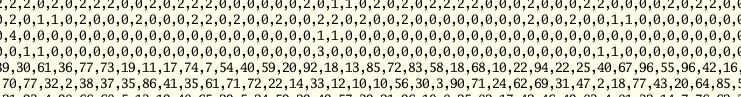

essentially expand the '3' to fill the ground

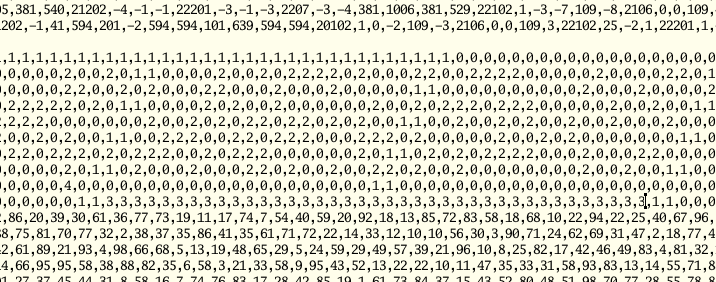

In [27]:
# override to always pass 0 to input (joystick not move)
function execute(prog,p,offset,input,output)
    push!(prog,zeros(Int,100000)...)
    op = getOps(prog[pos(p)])
    while op.op != halt
        (p,input,output,offset,halt) = execute(op,p,offset,prog,[0],output)
        if halt
            return (prog,p,output,:pause)
        end
        op = getOps(prog[pos(p)])
    end 
    (prog,p,output,:over)
end


using DelimitedFiles
prog = readdlm("input2.txt", '\t', Int, ',')[:,1]
(prog,p,output,state) =  (execute(prog,0,0,[],[]))
println(output[end])

11140
